<a href="https://www.kaggle.com/code/yunusemreturkoglu/ab-testing?scriptVersionId=144892288" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

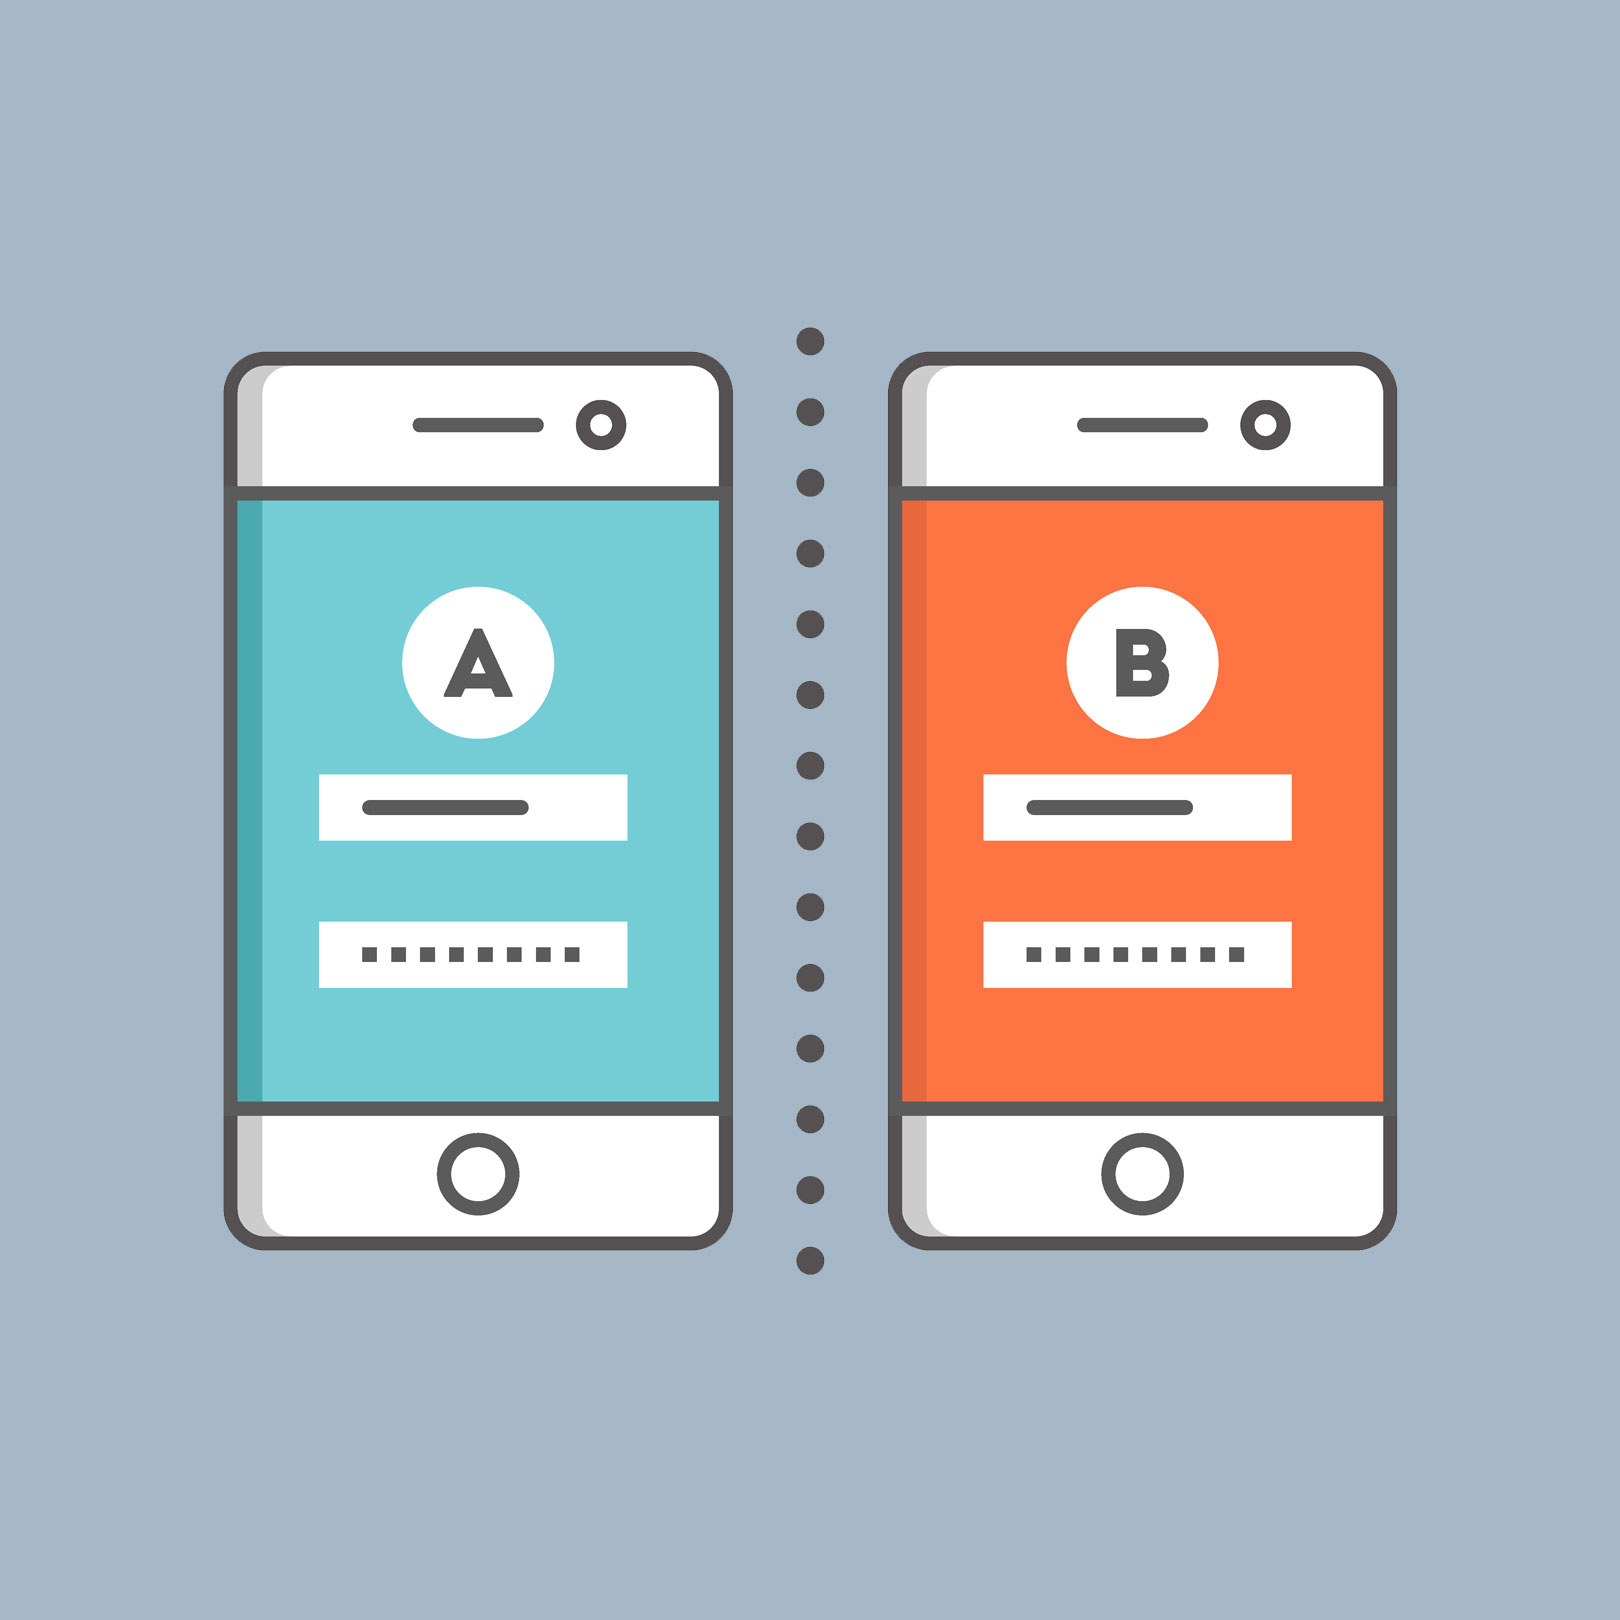

# <span style="Bradley Hand:;">WHAT IS THE AB TESTING ? </span>
A/B testing, also known as split testing, is a method of comparing two variants(A and B) to determine which one performs better. In A/B testing, two variants (A and B) are created with one element of the design or content being different between the two variants. The two versions are then shown randomly to users, and their behavior is monitored and compared to determine which variant performs better based on a predefined goal, such as the conversion rate, click-through rate, or engagement rate.

A/B testing is commonly used in website optimization, digital marketing, and product development to determine which variant is more effective at achieving a specific goal. It helps businesses make data-driven decisions by providing insight into what resonates better with their audience and what changes can be made to improve the user experience and increase conversions.

# <span style="Bradley Hand:;">Description of Dataset </span>
**total_bill** : total price of the meal (including tip and tax)</br>
**tip**        : tip</br>
**sex**        : gender of the person paying the fee</br>
**smoker**     : Any smokers in the group?(0 = No, 1 = Yes)  
**day**        : day(Thursday, Friday, Saturday, Sunday)</br>
**time**       : when?(Day and Night)</br>
**size**       : number of people in the group</br>

In [ ]:

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df = sns.load_dataset('tips')
df.head()


In [ ]:
def check_df(dataframe, head = 5):
    print("############## Shape ##############")
    print(dataframe.shape)
    print("############## Types ##############")
    print(dataframe.dtypes)
    print("############## Head ##############")
    print(dataframe.head(head))
    print("############## Tail ##############")
    print(dataframe.tail(head))
    print("############## NA ##############")
    print(dataframe.isnull().sum())
    print("############## Quantiles ##############")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

In [ ]:
# Let's examine the correlation between tip and total_bill
df["total_bill"] = df["total_bill"] - df["tip"]
df['tip'].corr(df["total_bill"])
# 0.5766634471096374 There is a slightly above moderate correlation.

In [ ]:
df.plot.scatter('tip', 'total_bill')
plt.show()
# There is a moderate positive correlation between total_bill and tip.   
# we can say that the higher the bill paid, the higher the tip given

In [ ]:
# Let's convert smoker(categorical to numerical).

df["smoker"].replace(["No", "Yes"], [0, 1], inplace=True)
df.tail(10)



In [ ]:
# Let's examine the correlation between smoker and tip

df["tip"].corr(df["smoker"])
# there is a very low level of positive correlation 0.005928539527806581

# <span style="Bradley Hand:;">AB TESTING ? </span>
## Is There a Statistically Significant Difference Between the Tip of Smokers and Non-Smokers?

H0: S1 = S2 -> There isnot a statistically significant difference between the tip of smokers and non-smokers</br>
H1: S1! = S2 -> There is a statistically significant difference between the tip of smokers and non-smokers</br>

Checking **normality assumption and variance homogeneity**



In [ ]:
# Normality assumption
# H0: The normality assumption is met.
# H1: The normality assumption is not met.
test_stat, pvalue = shapiro(df.loc[df["smoker"] == 1, 'tip']) 
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# p-value < 0.05 H0 is rejected. The normality assumption is not met

In [ ]:
test_stat, pvalue = shapiro(df.loc[df["smoker"] == 0, 'tip']) 
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# p-value < 0.05 H0 is rejected. The normality assumption is not met

In [ ]:
# Variance Homogeneity
# H0 = The variance homogeneity is met
# H1 = The variance homogeneity is not met.
test_stat, pvalue = levene(df.loc[df['smoker'] == 1, 'tip'],
                           df.loc[df['smoker'] == 0, 'tip'])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# p-value > 0.05. H0 is not rejected. The variances are homogeneous.


In [ ]:
# Formulation of Hypotheses

# H0: S1 = S2 -> There is not a statistically significant difference between the tip of smokers and non-smokers
# H1: S1 != S2 -> There is a statistically significant difference between the tip of smokers and non-smokers
test_stat, pvalue = mannwhitneyu(df.loc[df["smoker"] == 1, "tip"],
                              df.loc[df["smoker"] == 0, "tip"])
print('Test Stat %.4f, p-value %.4f' % (test_stat, pvalue))

# p_value > 0.05 is not rejected. There is not a statistically significant difference between the tip of smokers and non-smokers.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Thank you for supports and comments.✌️✌🏿
    </br>
You can follow me: </br>
linkedin: <a href="https://www.linkedin.com/in/yunus-emre-turkoglu-89804b193/" target="_blank"><font color=white>Visit My Profile</font></a>

</p>
</div>